# Random Value Imputation

### Overview:
Random value imputation is a technique used to handle missing data in a dataset by replacing missing values with random values from the observed distribution of that variable. This method aims to maintain the natural variability and distribution of the data.

### How It Works:
1. **Identify Missing Data:** Determine which values in the dataset are missing.
2. **Sample Random Values:** For each missing value, randomly select a value from the observed (non-missing) data in the same variable.
3. **Replace Missing Values:** Replace the missing values with the randomly selected values.

### Advantages:
1. **Preserves Data Distribution:** Random value imputation helps in maintaining the overall distribution of the data, as the imputed values come from the same distribution as the observed values.
2. **Simple to Implement:** This method is easy to implement and does not require complex algorithms or models.
3. **Avoids Bias:** Since values are imputed randomly from the existing data, it reduces the risk of introducing systematic bias compared to methods like mean or median imputation.

### Disadvantages:
1. **Introduces Noise:** Imputation using random values may introduce additional variability (noise) into the dataset, potentially affecting the analysis or model performance.
2. **Not Suitable for Small Datasets:** In small datasets, the random imputation may not accurately represent the distribution, leading to skewed or misleading results.
3. **Potential for Inconsistency:** Randomly imputed values might not align with other variables in the dataset, leading to inconsistencies or unrealistic data combinations.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# for numerical dataset

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [7]:
# creating new column for better comparision
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [8]:
X_test

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0
...,...,...,...
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0


In [9]:
# Impute missing values in the training set
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum(), random_state=0).values

# Impute missing values in the test set
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum(), random_state=0).values


In [10]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([22.  , 38.  , 18.  , 15.  , 15.  , 42.  , 40.  , 39.  ,  9.  ,
       30.  , 60.  , 47.  , 32.  , 36.  , 34.  , 42.  , 60.  , 28.  ,
       16.  , 62.  , 27.  , 39.  , 20.  , 54.  , 29.  , 18.  , 29.  ,
       23.  , 22.  , 27.  , 19.  , 28.  , 51.  , 49.  , 22.  , 31.  ,
       27.  , 56.  , 36.  , 40.  , 34.  , 27.  , 37.  , 19.  ,  7.  ,
        1.  , 36.  , 40.  , 25.  , 25.  , 52.  , 33.  , 48.  , 42.  ,
       47.  , 32.  , 50.  , 19.  , 16.  , 22.  , 36.  , 17.  , 22.  ,
       17.  , 30.  ,  4.  , 19.  , 33.  , 26.  , 26.  , 17.  , 47.  ,
       52.  ,  6.  , 28.  , 42.  , 47.  , 24.  , 30.  , 30.  , 15.  ,
       28.5 , 36.  , 30.  , 58.  , 35.  , 54.  , 36.  , 29.  , 43.  ,
       30.  , 14.  , 61.  ,  2.  , 61.  ,  6.  , 50.  , 24.  , 22.  ,
       51.  , 19.  , 34.  , 25.  , 31.  , 18.  , 38.  , 26.  ,  4.  ,
       16.  , 22.  , 40.  , 38.  , 43.  ,  8.  , 44.  , 42.  , 35.  ,
       41.  , 22.  , 25.  , 33.  , 24.  ,  0.75, 42.  , 33.  , 43.  ,
       41.  , 21.  ,

In [11]:
X_train['Age'].isnull().sum()

148

In [12]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,23.0
493,71.0,49.5042,71.0
527,NaN,221.7792,60.0


C:\Users\write\AppData\Local\Temp\ipykernel_4068\1079349144.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
C:\Users\write\AppData\Local\Temp\ipykernel_4068\1079349144.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[

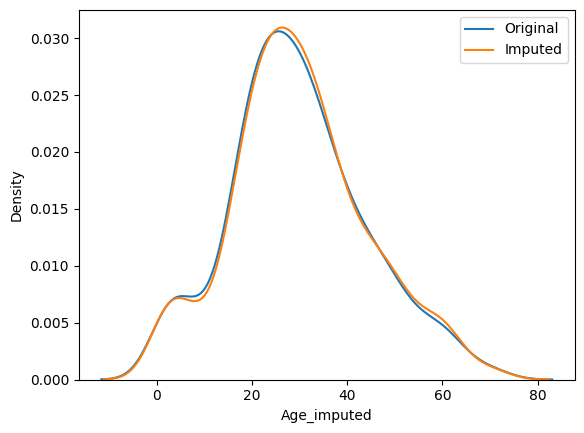

In [13]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label='Imputed', hist=False)

plt.legend()
plt.show()

In [14]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.9615264487429


In [15]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,63.137063
Age,71.512440,204.349513,204.349513
Age_imputed,63.137063,204.349513,204.961526


<Axes: >

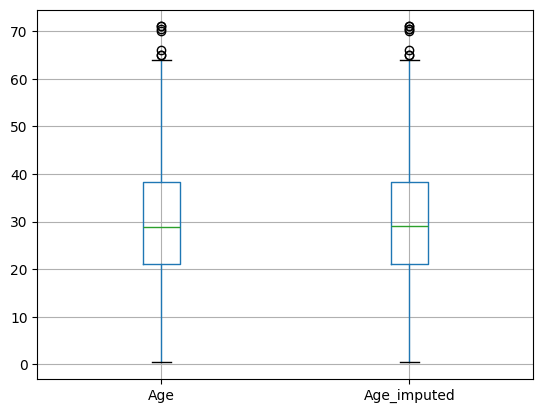

In [16]:
X_train[['Age', 'Age_imputed']].boxplot()

In [17]:
# # it helps when two use gives same input then the output will also be same, instead of different due to random 
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

# for categorical dataset

In [18]:
data = pd.read_csv('house_train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

In [19]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [20]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [21]:
X = data
y = data['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_train['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [24]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1191,NaN,TA,174000,TA,NaN
1125,TA,Fa,115000,Fa,TA
223,NaN,TA,97000,TA,NaN
591,Gd,TA,451950,TA,Gd
686,NaN,TA,227875,TA,NaN


In [25]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

we are checking the frequency of every category in categorical column

if frequency is very differ from each other then this method is not recommanded to use

In [26]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp # it is good to use this method on this column because both the original and imputed frequency are not differing much

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.036815
Gd,0.009973,0.010274
Po,0.000907,0.001712
Ex,0.000907,0.000856


In [27]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp # here it is differ from each other very much , so this method is not recommanded on 'FireplaceQu' row

,original,imputed
Gd,0.494272,0.654321
TA,0.412439,0.533109
Fa,0.040917,0.056117
Po,0.027823,0.037037
Ex,0.024550,0.030303


C:\Users\write\AppData\Local\Temp\ipykernel_4068\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\write\AppData\Local\Temp\ipykernel_4068\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

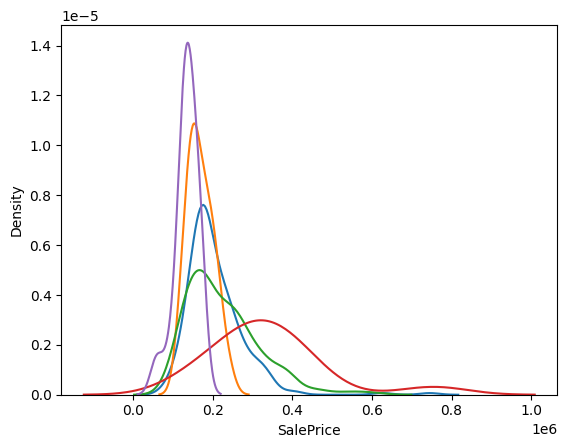

In [28]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\write\AppData\Local\Temp\ipykernel_4068\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\write\AppData\Local\Temp\ipykernel_4068\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974

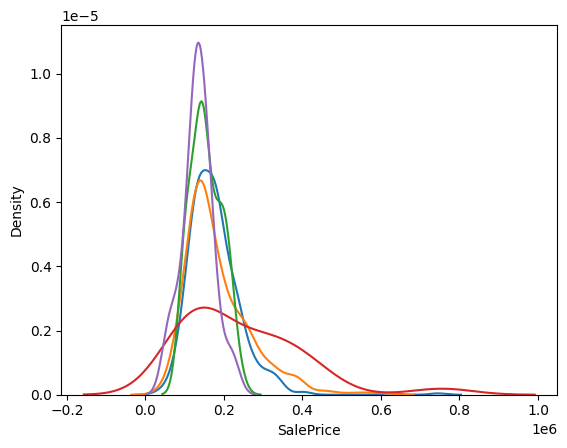

In [29]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

# Missing Indicator

### Missing Indicator in Data Handling

**What is a Missing Indicator?**
A Missing Indicator is a method used to handle missing data by creating a new column in your dataset. This new column shows whether a value was missing or not.

**Advantages of Using a Missing Indicator:**
1. **Identifies Missing Data:** Clearly marks which values are missing, helping you understand the pattern of missingness.
2. **Keeps Original Data:** Does not alter the original data values, only adds a new column.
3. **Improves Model Performance:** Can help machine learning models better handle missing data by providing additional information.
4. **Easy to Implement:** Simple to create and integrate into your existing data processing pipeline.

**Where to Use:**
- **Data Preprocessing:** During data cleaning, to keep track of missing values before applying other imputation methods.
- **Machine Learning Models:** In models where missing data might influence outcomes or predictions.
- **Exploratory Data Analysis (EDA):** To explore and understand the extent of missing data.

**Example:**
If you have a dataset with a column for "Age," and some ages are missing, you can add a new column named "Age_Missing" with values like 1 for missing and 0 for not missing. This way, you can use both the original "Age" and the new "Age_Missing" column in your analysis or model.

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator, SimpleImputer

In [31]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [32]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [33]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [35]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


### finding accuracy without using this method

In [36]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [37]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf, y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.6145251396648045

### finding accuracy using this method

In [39]:
mi = MissingIndicator()

In [40]:
mi.fit(X_train)

MissingIndicator()

In [41]:
# shows in which columns the values are missing
mi.features_ # in this case it is 0, means 'age'

array([0], dtype=int64)

In [42]:
X_train_missing = mi.transform(X_train)
X_test_missing = mi.transform(X_test)

In [43]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [44]:
X_train['Age_NA'] = X_train_missing

In [45]:
X_test['Age_NA'] = X_test_missing

In [46]:
X_train.sample(7)

,Age,Fare,Age_NA
189,36.0,7.8958,False
793,NaN,30.6958,True
240,NaN,14.4542,True
104,37.0,7.9250,False
176,NaN,25.4667,True
519,32.0,7.8958,False
761,41.0,7.1250,False


In [47]:
si = SimpleImputer()

In [48]:
si.fit(X_train)

SimpleImputer()

In [49]:
X_train_trf2 = si.transform(X_train)
X_test_trf2 = si.transform(X_test)

In [50]:
X_train_trf2

array([[ 40.        ,  27.7208    ,   0.        ],
       [  4.        ,  16.7       ,   0.        ],
       [ 47.        ,   9.        ,   0.        ],
       ...,
       [ 71.        ,  49.5042    ,   0.        ],
       [ 29.78590426, 221.7792    ,   1.        ],
       [ 29.78590426,  25.925     ,   1.        ]])

In [51]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2, y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test) # here we observe that the accuracy of the model is increased by 2

0.6312849162011173

we can also not use the MissingIndicator class, instead what we can do that we pass the parameter in SimpleImputer function (add_indicator=True) . Using this we dont have to create the new column for missing indicator

In [52]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(add_indicator=True)

si.fit(X_train)

X_train = si.transform(X_train)
X_test = si.transform(X_test)

In [53]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test) # here we observe that the accuracy is same as was in Missing Indicator method

0.6312849162011173

# Grid Search CV

### Why Use Grid Search CV?
Grid Search CV is used to automate the process of finding the best hyperparameters for a machine learning model. Instead of manually tuning parameters, which can be time-consuming and error-prone, Grid Search CV systematically explores all possible combinations of specified hyperparameters to determine the optimal configuration.

### Where to Use Grid Search CV?
Grid Search CV is commonly used in:
- **Model Optimization**: When you want to improve the performance of a model by finding the best hyperparameters.
- **Complex Models**: For models with multiple hyperparameters, like SVMs, Random Forests, or Neural Networks.
- **Final Model Tuning**: Before deploying a model, to ensure it is performing at its best on the given data.

### Importance of Grid Search CV
Grid Search CV is important because it:
- **Ensures Optimal Performance**: By systematically searching through hyperparameters, it maximizes the model's potential.
- **Eliminates Guesswork**: It removes the trial-and-error approach in hyperparameter tuning, making the process more efficient.
- **Standardizes Tuning**: Provides a consistent method to tune models across different datasets and algorithms.

### Advantages of Grid Search CV
- **Exhaustive Search**: It checks all possible combinations of specified hyperparameters, ensuring that the best one is not missed.
- **Cross-Validation Integration**: Incorporates cross-validation, which reduces overfitting and gives a more reliable estimate of model performance.
- **Automated Process**: Saves time and effort by automating the hyperparameter tuning process, especially for complex models.
- **Improved Model Accuracy**: Often leads to better-performing models by finding the most suitable hyperparameters.

In [55]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression

In [56]:
df = pd.read_csv('train.csv')

In [57]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [59]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [60]:
X=df.drop(columns=['Survived'])
y=df['Survived']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [62]:
X_train.isnull().sum()

Pclass        0
Sex           0
Age         148
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [63]:
# creating pipeline for imputing and onehotencoder
numerical_features = ['Age', 'Fare']

numerical_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
    ]
)

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

In [64]:
# creating column transformer which is the steps of preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ]
)

In [65]:
# creating pipeline from preproccessing to training model
clf = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression()),
    ]
)

clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [66]:
# grid search cv
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'], # Strategies for numerical 
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'], # Strategies for categorical
    'classifier__C': [0.1, 1.0, 10, 100] # this are fixed value for logistic Regression
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [67]:
grid_search.fit(X_train, y_train)

print("Best Params: ")
print(grid_search.best_params_)

Best Params: 
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
